In [1]:
!unzip CNN_dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/009317.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009317.jpeg  
  inflating: CNN_dataset/CXR/002808.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._002808.jpeg  
  inflating: CNN_dataset/CXR/000835.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._000835.jpeg  
  inflating: CNN_dataset/CXR/001727.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001727.jpeg  
  inflating: CNN_dataset/CXR/004525.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._004525.jpeg  
  inflating: CNN_dataset/CXR/006518.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._006518.jpeg  
  inflating: CNN_dataset/CXR/008855.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._008855.jpeg  
  inflating: CNN_dataset/CXR/009747.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._009747.jpeg  
  inflating: CNN_dataset/CXR/001377.jpeg  
  inflating: __MACOSX/CNN_dataset/CXR/._001377.jpeg  
  inflating: CNN_dataset/CXR/004175.jpeg  
  inflating: __MACOSX/CNN_dataset

In [26]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

In [6]:
dataset_path = './CNN_dataset'

# List of classes
classes = ['AbdomenCT', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

# Initialize lists to store images and labels
images = []
labels = []



In [9]:
# Load images and labels
for label, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    for file in os.listdir(class_path):
        if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
            img_path = os.path.join(class_path, file)
            # Load image
            img = Image.open(img_path).convert('L')  # Ensure grayscale ('L' mode)
            img = img.resize((64, 64))  # Resize to 64x64 if needed
            images.append(np.array(img))
            labels.append(label)

In [12]:
# Convert lists to numpy arrays
images = np.array(images, dtype='float32') / 255.0  # Normalize pixel values to [0, 1]
images = np.expand_dims(images, axis=-1)  # Add a channel dimension for grayscale images
labels = np.array(labels)

In [13]:
images.shape

(50000, 64, 64, 1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [15]:
x_train.shape

(40000, 64, 64, 1)

In [20]:
y_train.shape

(40000,)

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

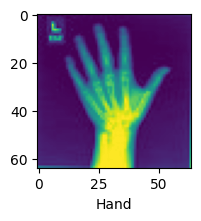

In [22]:
plot_sample(x_train, y_train, 0)

In [23]:
y_train[0]

3

In [24]:
x_train[0]

array([[[0.05490196],
        [0.02352941],
        [0.05882353],
        ...,
        [0.11372549],
        [0.12156863],
        [0.1254902 ]],

       [[0.02745098],
        [0.07450981],
        [0.        ],
        ...,
        [0.05490196],
        [0.0627451 ],
        [0.06666667]],

       [[0.04313726],
        [0.03529412],
        [0.03921569],
        ...,
        [0.05098039],
        [0.05882353],
        [0.0627451 ]],

       ...,

       [[0.12156863],
        [0.11764706],
        [0.11372549],
        ...,
        [0.12156863],
        [0.1254902 ],
        [0.6901961 ]],

       [[0.10980392],
        [0.10196079],
        [0.09411765],
        ...,
        [0.12941177],
        [0.14117648],
        [0.7137255 ]],

       [[0.40784314],
        [0.39607844],
        [0.38039216],
        ...,
        [0.14117648],
        [0.15294118],
        [0.7294118 ]]], dtype=float32)

In [27]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [30]:
cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9506 - loss: 0.1344
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9985 - loss: 0.0055
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9988 - loss: 0.0042
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9984 - loss: 0.0046
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9996 - loss: 0.0012
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9989 - loss: 0.0041
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9994 - loss: 0.0019
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9995 - loss: 0.0014
Epoch 9/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9998 - loss: 2.9476e-04
Epoch 10/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9988 - loss: 0.0059
Epoch 11/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9999 - loss: 4.4723e-04
Epoch 12/15
1250/1

In [31]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9997 - loss: 0.0013


[0.0022943306248635054, 0.9994999766349792]

#Manual Testing

In [35]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


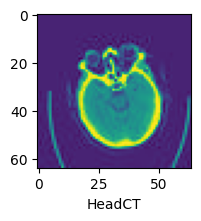

In [36]:
plot_sample(x_test, y_test, 37)

In [38]:
print("Prediction is " , classes[np.argmax(y_pred[37])])

Prediction is  HeadCT


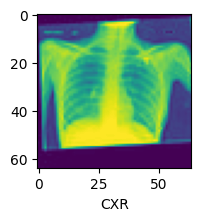

In [41]:
plot_sample(x_test, y_test, 1241)

In [42]:
print("Prediction is ", classes[np.argmax(y_pred[1241])])

Prediction is  CXR
